# Adversarial Variational Optimization

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Discriminator

In [2]:
num_hidden = 100
discriminator = torch.nn.Sequential(
    torch.nn.Linear(1, num_hidden),
    torch.nn.SELU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.SELU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.SELU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.SELU(),
    torch.nn.Linear(num_hidden, 1),
    torch.nn.Sigmoid())

## Simulator

In [3]:
from torch.distributions.poisson import Poisson

def simulator(inputs):
    poisson = Poisson(inputs)
    return poisson.sample()

## Observations

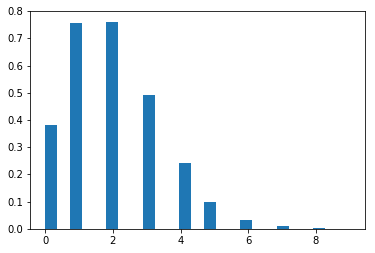

In [4]:
truth = torch.tensor(1.95).repeat(10000)
observations = simulator(truth)

plt.hist(observations.numpy(), bins=25, density=True)
plt.show()

## Proposal

In [5]:
from hypothesis.proposal import Normal as Proposal

proposal = Proposal(sigma=.1)

proposal.mu

tensor(0., requires_grad=True)

## Inference procedure

In [6]:
from hypothesis.inference.avo import AdversarialVariationalOptimizationPlus as AVO

avo = AVO(simulator, discriminator)
proposal = avo.infer(observations, proposal=proposal, steps=50000, lr_proposal=0.001)

In [7]:
proposal.mu

tensor(2.1918, requires_grad=True)